## Credit Risk Predictor

##### This project aims to build a predictive model for credit risk assessment using the German Credit Data dataset from the UCI Machine Learning Repository
###### (https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data).

##### The goal is to predict the Probability of Default (PD), i.e., whether a customer will repay the credit or default. 

##### Key points covered in this project:
###### Data exploration and preprocessing: handling categorical and numerical variables, missing data, and feature engineering.
###### Model selection and training: comparing several classification algorithms to find the best-performing model.
###### Custom threshold tuning: adjusting the classification threshold to balance sensitivity and specificity according to business needs.
###### Evaluation: detailed performance metrics including classification report and confusion matrix.
###### Model serialization: saving the final model pipeline for deployment.

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("/Users/kamilakubicka/Desktop/Projekty/German bank /statlog+german+credit+data/german.data", delimiter=' ', header=None)
print(df.head())

    0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

     14 15    16 17    18    19 20  
0  A152  2  A173  1  A192  A201  1  
1  A152  1  A173  1  A191  A201  2  
2  A152  1  A172  2  A191  A201  1  
3  A153  1  A173  2  A191  A201  1  
4  A153  2  A173  2  A191  A201  2  

[5 rows x 21 columns]


In [8]:
columns = [
    "Status_of_existing_checking_account", "Duration_in_month", "Credit_history",
    "Purpose", "Credit_amount", "Savings_account", "Present_employment_since",
    "Installment_rate_in_percentage_of_disposable_income", "Personal_status_and_sex",
    "Other_debtors_or_guarantors", "Present_residence_since", "Property",
    "Age_in_years", "Other_installment_plans", "Housing", "Number_of_existing_credits",
    "Job", "Number_of_people_being_liable_to_provide_maintenance_for", "Telephone",
    "foreign_worker", "Target"
]

df.columns = columns
df.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_or_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [11]:
# Checking for missing values
df.isnull().sum()

Status_of_existing_checking_account                         0
Duration_in_month                                           0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_account                                             0
Present_employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors_or_guarantors                                 0
Present_residence_since                                     0
Property                                                    0
Age_in_years                                                0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits                                  0
Job     

In [12]:
df.describe()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits,Number_of_people_being_liable_to_provide_maintenance_for,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [13]:
df.nunique()

Status_of_existing_checking_account                           4
Duration_in_month                                            33
Credit_history                                                5
Purpose                                                      10
Credit_amount                                               921
Savings_account                                               5
Present_employment_since                                      5
Installment_rate_in_percentage_of_disposable_income           4
Personal_status_and_sex                                       4
Other_debtors_or_guarantors                                   3
Present_residence_since                                       4
Property                                                      4
Age_in_years                                                 53
Other_installment_plans                                       3
Housing                                                       3
Number_of_existing_credits              

## Target class distribution

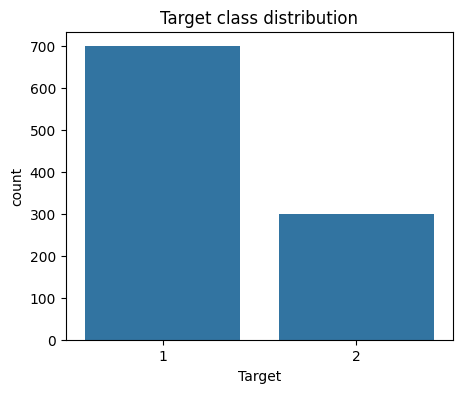

Class proportion:
 Target
1    0.7
2    0.3
Name: proportion, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='Target', data=df)
plt.title('Target class distribution')
plt.show()

print("Class proportion:\n", df['Target'].value_counts(normalize=True))


## Distribution and outliers of numeric variables

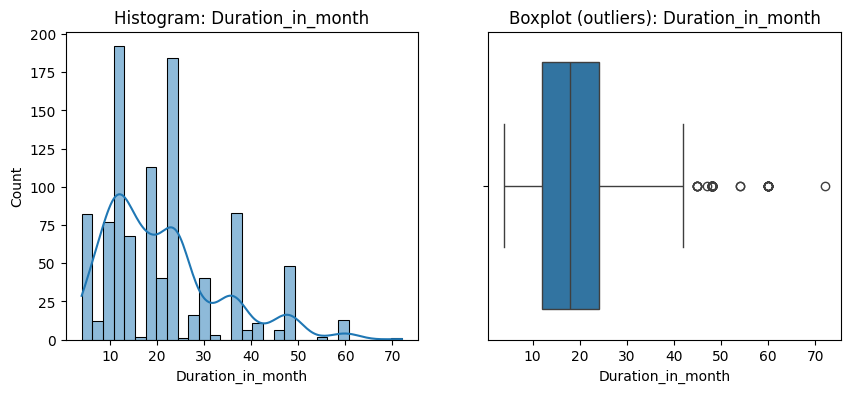

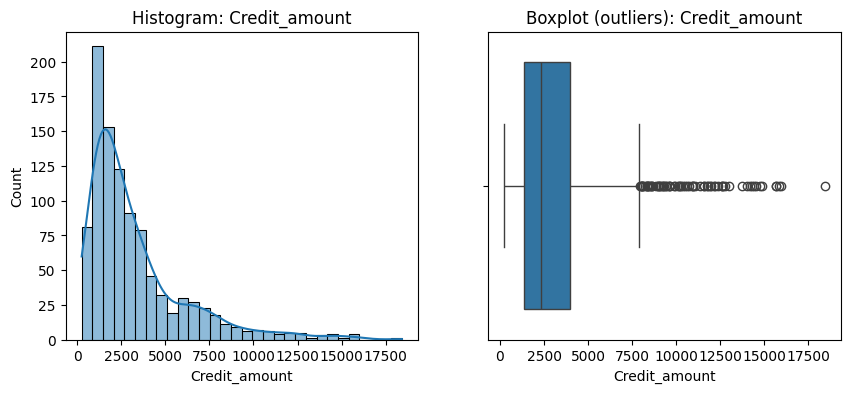

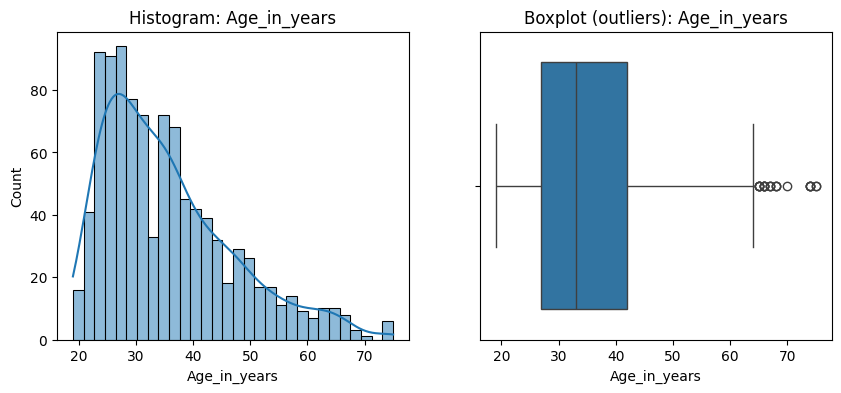

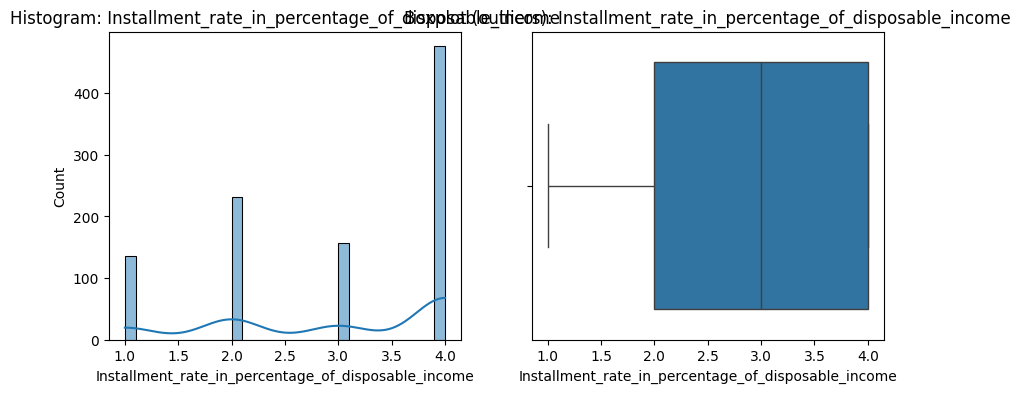

In [16]:
num_cols = ['Duration_in_month', 'Credit_amount', 'Age_in_years', 'Installment_rate_in_percentage_of_disposable_income']

for col in num_cols:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram: {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot (outliers): {col}')
    
    plt.show()


## Correlations between numerical variables

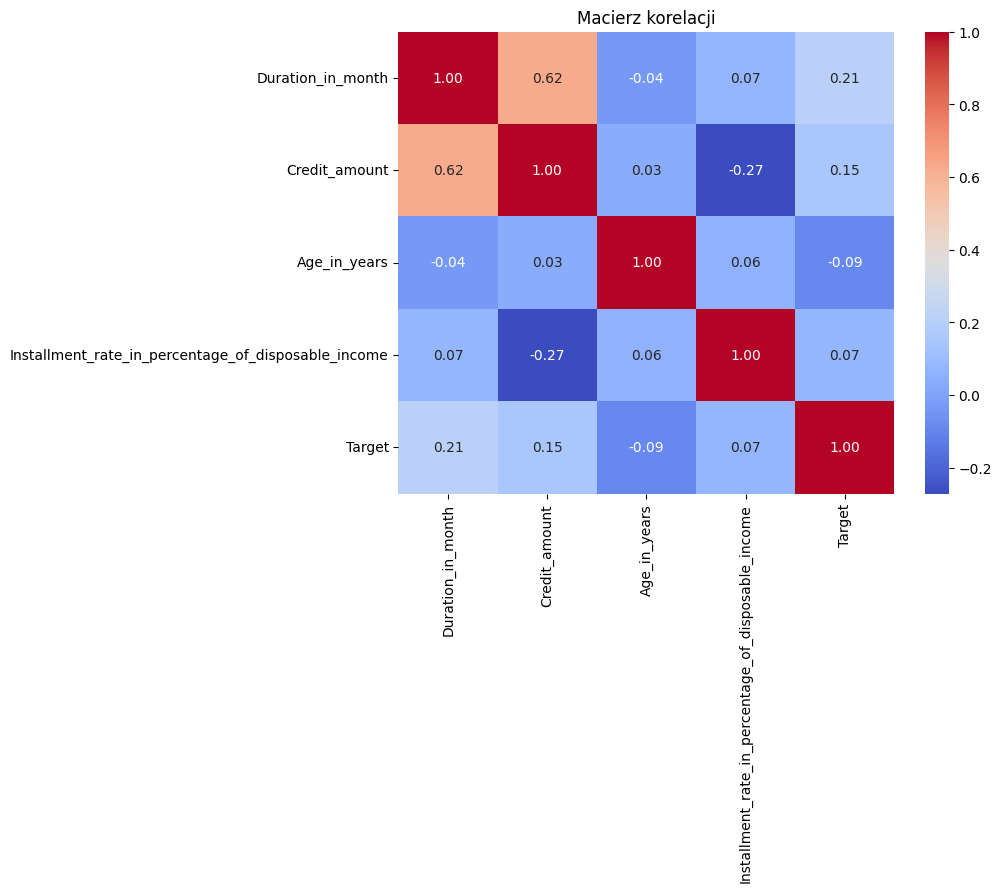

In [17]:
plt.figure(figsize=(8,6))
corr = df[num_cols + ['Target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()


## The number of categories in the categorical

In [19]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < 20]

for col in cat_cols:
    print(f"Liczność kategorii w kolumnie '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")


Liczność kategorii w kolumnie 'Status_of_existing_checking_account':
Status_of_existing_checking_account
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

----------------------------------------

Liczność kategorii w kolumnie 'Credit_history':
Credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

----------------------------------------

Liczność kategorii w kolumnie 'Purpose':
Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

----------------------------------------

Liczność kategorii w kolumnie 'Savings_account':
Savings_account
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

----------------------------------------

Liczność kategorii w kolumnie 'Present_employment_since':
Present_employment_since
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64

---

## Data preparation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [22]:
# X i y
X = df.drop("Target", axis=1)
y = df["Target"]

# Dividing by columns num and cat
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()

# Preprocessing – one hot encoding for cat
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)


In [23]:
# Divide to: train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)


In [27]:
# Pipeline: preprocessing + classifier
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=123))
])


In [28]:
pipeline.fit(X_train, y_train)

# Prediction
y_pred = pipeline.predict(X_test)

# evalution 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.93      0.85       139
           2       0.72      0.43      0.54        61

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.69       200
weighted avg       0.77      0.78      0.76       200



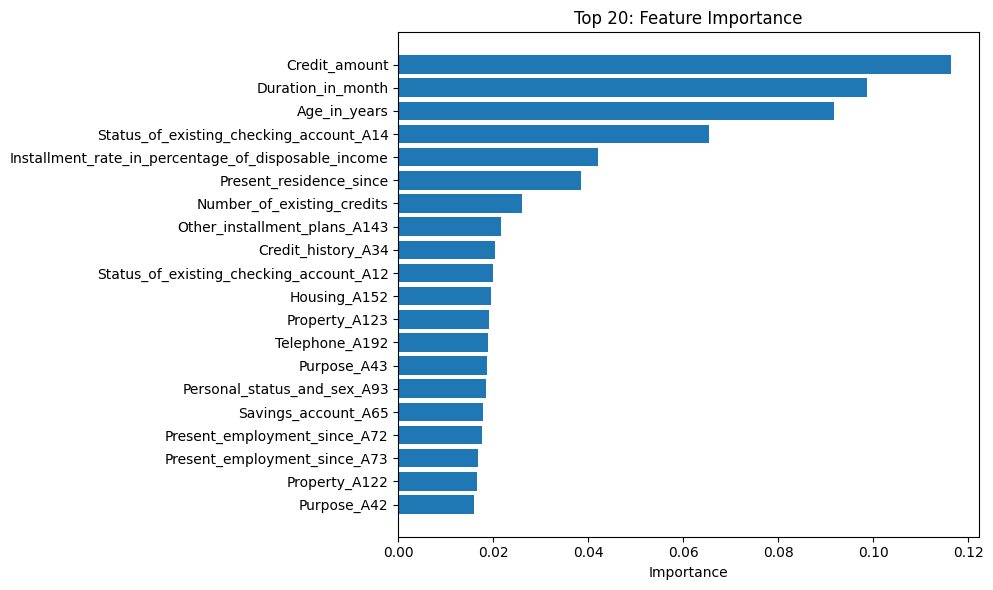

In [31]:
#  Feature Importance 
import pandas as pd
import matplotlib.pyplot as plt

# Features names after one-hot encoding
onehot = pipeline.named_steps['preprocessing'].named_transformers_['cat']
onehot_feature_names = onehot.get_feature_names_out(categorical_cols)
all_feature_names = list(onehot_feature_names) + numeric_cols

#  Feature importances
importances = pipeline.named_steps['classifier'].feature_importances_

#  DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20][::-1], feat_imp_df['Importance'][:20][::-1])
plt.title('Top 20: Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


## Checking other models: GradientBoostingClassifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier


# Pipeline: preprocessing + GradientBoostingClassifier
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=123))
])

# MOdel training
pipeline.fit(X_train, y_train)

# Prediction
y_pred = pipeline.predict(X_test)

# Ewaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.88      0.84       139
           2       0.65      0.52      0.58        61

    accuracy                           0.77       200
   macro avg       0.73      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



In [34]:
##

## Checking other models: LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(random_state=123, max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.83      0.86      0.84       139
           2       0.65      0.61      0.63        61

    accuracy                           0.78       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.78      0.78      0.78       200



/opt/miniconda3/envs/projekty/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
#


## Model comparison 

/opt/miniconda3/envs/projekty/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


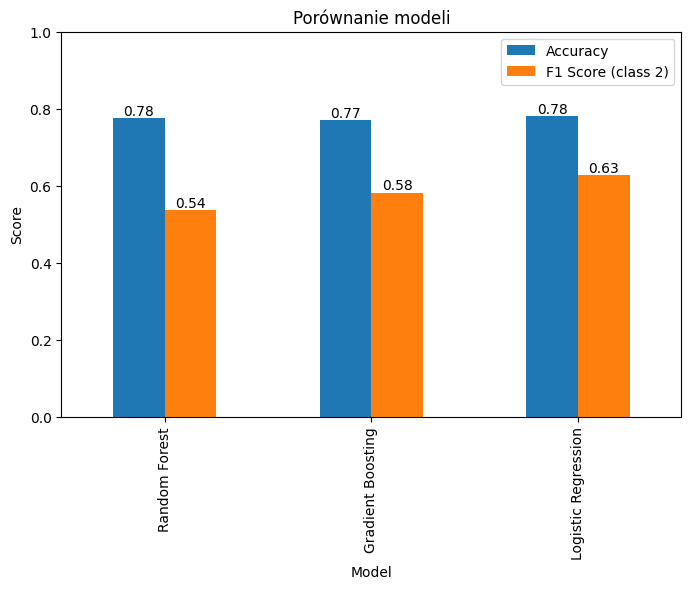

In [40]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123),
    "Logistic Regression": LogisticRegression(random_state=123, max_iter=1000)
}

results = []

for name, clf in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=2)  # dla klasy 2
    results.append({"Model": name, "Accuracy": acc, "F1 Score (class 2)": f1})

df_results = pd.DataFrame(results)


ax = df_results.set_index("Model")[["Accuracy", "F1 Score (class 2)"]].plot(kind='bar', figsize=(8,5))
plt.title("Porównanie modeli")
plt.ylabel("Score")
plt.ylim(0, 1)

# Dodajemy wartości nad słupkami
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, rotation=0)

plt.show()



In [41]:
#

## Confusion matrix

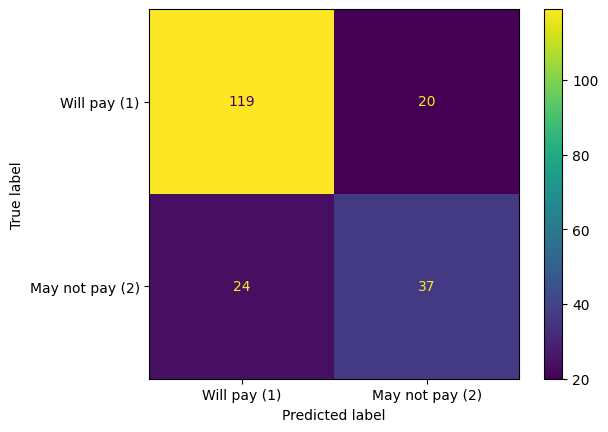

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Will pay (1)", "May not pay (2)"])
disp.plot()


## Confusion Matrix Analysis:

##### The confusion matrix reveals that our model correctly identifies most customers who will repay their loans (True Positives = 119), but there are still a notable number of misclassifications, particularly False Positives (24) — cases where the model incorrectly predicts loan repayment for customers who eventually default.

#### Why?
##### The model may be biased toward the majority class because the dataset is imbalanced (more good borrowers than risky ones), so it favors the larger group.
##### The decision threshold (the cutoff probability to decide class) might not be optimal — changing it can help balance false positives and false negatives better.

In [43]:
#

## Error identification

In [44]:
import pandas as pd

results = pd.DataFrame({'True': y_test, 'Pred': y_pred})

#checking which rows are misclassified
#Adding an Error column saying whether the model is wrong
results['Error'] = results['True'] != results['Pred']

errors = results[results['Error'] == True]
print(errors)


     True  Pred  Error
203     2     1   True
195     2     1   True
221     1     2   True
320     2     1   True
417     1     2   True
229     1     2   True
896     1     2   True
736     2     1   True
566     2     1   True
743     1     2   True
145     1     2   True
633     2     1   True
310     1     2   True
338     1     2   True
597     2     1   True
392     1     2   True
172     2     1   True
642     2     1   True
934     1     2   True
184     2     1   True
808     1     2   True
656     2     1   True
985     1     2   True
986     1     2   True
861     2     1   True
828     2     1   True
616     1     2   True
313     2     1   True
869     1     2   True
470     2     1   True
646     1     2   True
966     2     1   True
188     2     1   True
308     2     1   True
31      1     2   True
485     2     1   True
482     1     2   True
744     1     2   True
674     2     1   True
931     2     1   True
335     2     1   True
751     2     1   True
79      1  

In [45]:
# Index reset so they match
X_test_reset = X_test.reset_index(drop=True)
results_reset = results.reset_index(drop=True)

# Combine test data with predictions
errors_with_features = pd.concat([X_test_reset, results_reset], axis=1)

# Display only the incorrect cases
errors_only = errors_with_features[errors_with_features['Error']]
errors_only.head()


,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_or_guarantors,...,Other_installment_plans,Housing,Number_of_existing_credits,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,True,Pred,Error
1,A11,12,A32,A48,902,A61,A74,4,A94,A101,...,A143,A151,1,A173,1,A191,A201,2,1,True
10,A12,9,A34,A46,1501,A61,A75,2,A92,A101,...,A143,A152,2,A174,1,A192,A201,2,1,True
11,A11,12,A32,A46,1200,A65,A73,4,A92,A101,...,A141,A151,1,A173,1,A192,A201,1,2,True
17,A12,30,A34,A40,4249,A61,A71,4,A94,A101,...,A143,A152,2,A174,1,A191,A201,2,1,True
19,A11,18,A33,A46,8471,A65,A73,1,A92,A101,...,A143,A151,2,A173,1,A192,A201,1,2,True


## Comparison of some features

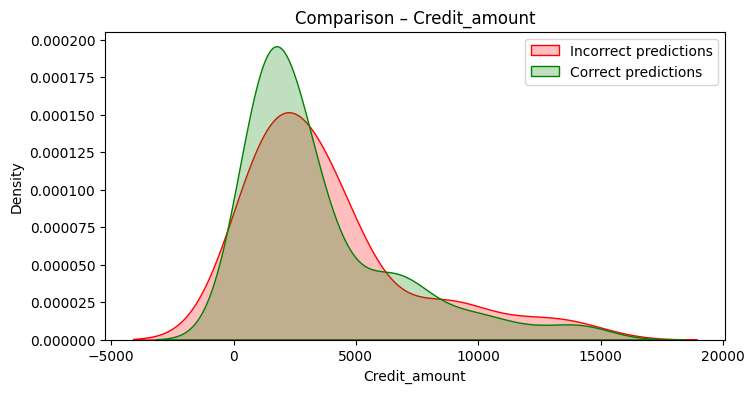

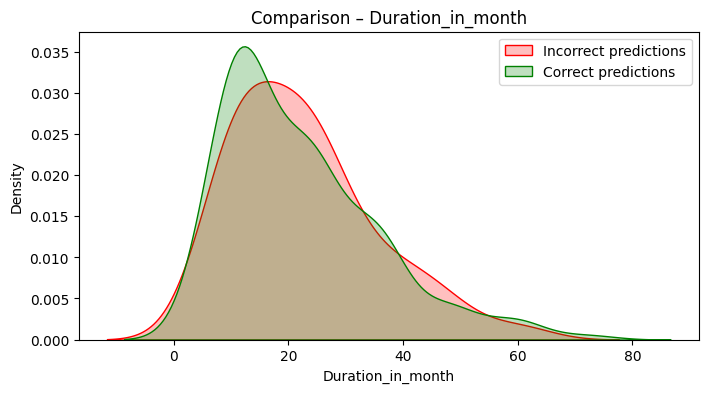

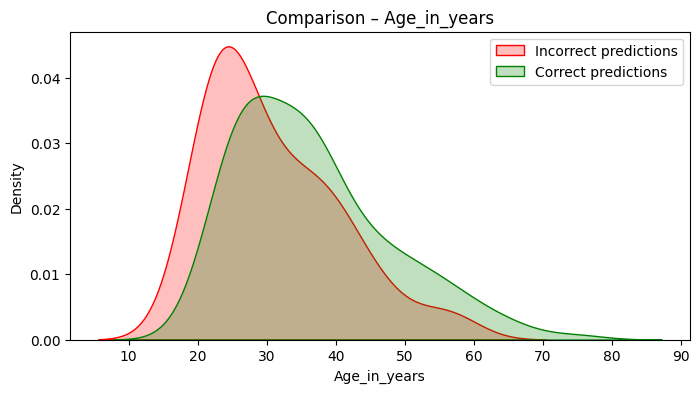

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

correct_only = errors_with_features[~errors_with_features["Error"]]

features_to_check = [
    "Credit_amount",
    "Duration_in_month",
    "Age_in_years"
]

for feature in features_to_check:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(errors_only[feature], label="Incorrect predictions", fill=True, color='red')
    sns.kdeplot(correct_only[feature], label="Correct predictions", fill=True, color='green')
    plt.title(f"Comparison – {feature}")
    plt.legend()
    plt.show()


## Model errors in relation to age

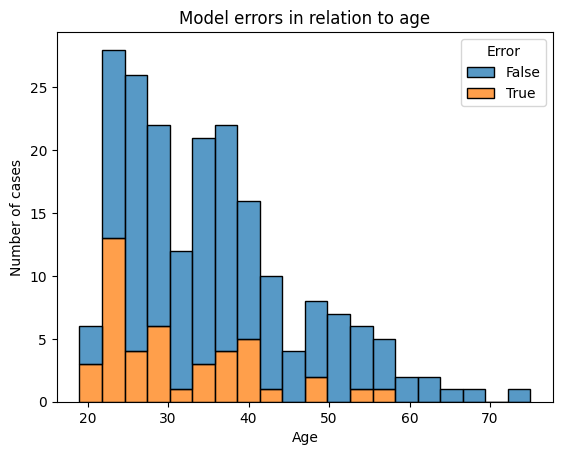

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

error_df = X_test.copy()
error_df["True"] = y_test
error_df["Pred"] = y_pred
error_df["Error"] = error_df["True"] != error_df["Pred"]

sns.histplot(data=error_df, x="Age_in_years", hue="Error", multiple="stack", bins=20)
plt.title("Model errors in relation to age")
plt.xlabel("Age")
plt.ylabel("Number of cases")
plt.show()


## Changing decision threshold and analysing how this affects the results

              precision    recall  f1-score   support

           1       0.86      0.78      0.82       139
           2       0.59      0.72      0.65        61

    accuracy                           0.76       200
   macro avg       0.73      0.75      0.73       200
weighted avg       0.78      0.76      0.77       200



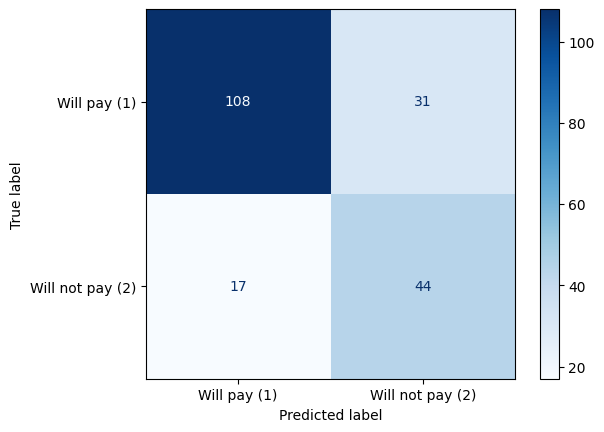

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predict probabilities
y_probs = pipeline.predict_proba(X_test)

threshold = 0.4

# Assignment of class 2 (worse) if probability of class 2 > threshold
y_pred_threshold = np.where(y_probs[:, 1] > threshold, 2, 1)

print(classification_report(y_test, y_pred_threshold))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Will pay (1)', 'Will not pay (2)'])
disp.plot(cmap='Blues')


              precision    recall  f1-score   support

           1       0.90      0.72      0.80       139
           2       0.56      0.82      0.67        61

    accuracy                           0.75       200
   macro avg       0.73      0.77      0.73       200
weighted avg       0.80      0.75      0.76       200



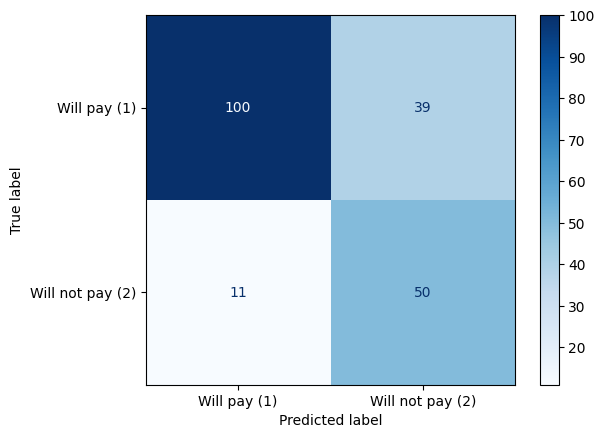

In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predict probabilities
y_probs = pipeline.predict_proba(X_test)

threshold = 0.3

# Assignment of class 2 (worse) if probability of class 2 > threshold
y_pred_threshold = np.where(y_probs[:, 1] > threshold, 2, 1)


print(classification_report(y_test, y_pred_threshold))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Will pay (1)', 'Will not pay (2)'])
disp.plot(cmap='Blues')


### conclusions

##### Lowering the decision threshold to 0.3 significantly increases recall for the non-payers class (82%), which may help catch more risky clients. However, it also increases the risk of wrongly rejecting clients who would actually repay, as shown by the drop in precision (to 56%). Threshold 0.4 appears to be a more balanced choice.

#### Final Model and Threshold Decision:

##### After testing multiple models, Logistic Regression was selected due to its strong and balanced performance. Despite being simpler than tree-based models, it provided the best combination of interpretability and predictive power, especially in identifying defaulters.

##### Additionally, after evaluating the trade-off between recall and precision, a threshold of 0.4 was chosen. At this level:

##### Recall for the defaulter class (class 2) is 0.72, meaning that 72% of actual defaulters were correctly identified.
##### Precision is 0.65, meaning that 65% of applicants predicted as defaulters truly were defaulters.
##### Compared to the default threshold of 0.5 (where recall was 0.61 and precision 0.65), this adjustment significantly improves our ability to detect risky clients, while keeping the rate of false positives at an acceptable level.

##### This trade-off is particularly important in the context of credit risk, where missing a defaulter (low recall) is usually more costly than wrongly rejecting a good client (false positive). The chosen configuration helps reduce risk exposure while maintaining fairness.

In [57]:
from sklearn.linear_model import LogisticRegression
import joblib

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(random_state=123, max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


# Save pipeline-logistic regression
joblib.dump(pipeline, "final_credit_model.pkl")

              precision    recall  f1-score   support

           1       0.83      0.86      0.84       139
           2       0.65      0.61      0.63        61

    accuracy                           0.78       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.78      0.78      0.78       200



/opt/miniconda3/envs/projekty/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['final_credit_model.pkl']

In [59]:
!jupyter nbconvert german_bank.ipynb --to slides --no-input --no-prompt

SyntaxError: invalid syntax (2707449498.py, line 1)